#Libraries

In [71]:
# Importing libraries for data manipulation
import numpy as np

import pandas as pd

# Importing libraries for data visualization
import seaborn as sns

import matplotlib.pyplot as plt

# Importing libraries for building linear regression model
import statsmodels.api as sm

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

from scipy.stats import skew

import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from scipy.stats import skew

import missingno as msno # to get visualization on missing values

# To build models for prediction
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor

# For tuning the model
from sklearn.model_selection import GridSearchCV

In [72]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
df = pd.read_csv('/content/drive/MyDrive/CrAutos Project/CRautosData.csv')

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11056 entries, 0 to 11055
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CRA_URL             11056 non-null  object
 1   Modelo              11056 non-null  object
 2   Precio1             11056 non-null  object
 3   Precio2             11056 non-null  object
 4   Equipamiento        10635 non-null  object
 5   Cilindrada          11056 non-null  object
 6   Estilo              11056 non-null  object
 7   # de pasajeros      11056 non-null  object
 8   Combustible         11056 non-null  object
 9   Transmisión         11056 non-null  object
 10  Estado              11056 non-null  object
 11  Kilometraje         11056 non-null  object
 12  Placa               11056 non-null  object
 13  Color exterior      11056 non-null  object
 14  Color interior      11025 non-null  object
 15  # de puertas        11056 non-null  int64 
 16  Ya pagó impuestos   11

In [75]:
df.head(10)

,CRA_URL,Modelo,Precio1,Precio2,Equipamiento,Cilindrada,Estilo,# de pasajeros,Combustible,Transmisión,...,Kilometraje,Placa,Color exterior,Color interior,# de puertas,Ya pagó impuestos,Precio negociable,Se recibe vehículo,Provincia,Fecha de ingreso
0,https://crautos.com/autosusados/cardetail.cfm?...,Geely CK 2007,"¢ 300,000",($ 594)*,Dirección Hidráulica/Electroasistida,1300 cc,Sedán,5,Gasolina,Manual,...,"400,000 kms",Termina en 5,ROJO,GRIS,5,NO,SI,NO,San José,19 de Junio del 2025
1,https://crautos.com/autosusados/cardetail.cfm?...,Toyota 1000 1979,"¢ 350,000",($ 693)*,NaN,1000 cc,Pick Up 2WD,2,Gasolina,Manual,...,"150,000 kms",Termina en 3,BLANCO,GRIS,2,SI,NO,NO,San José,07 de Julio del 2025
2,https://crautos.com/autosusados/cardetail.cfm?...,Chevrolet CAVALIER 1999,"¢ 500,000",($ 990)*,Dirección Hidráulica/Electroasistida Cierr...,2200 cc,Sedán,5,Gasolina,Manual,...,ND,Termina en 9,VERDE,GRIS,4,SI,NO,NO,San José,23 de Julio del 2025
3,https://crautos.com/autosusados/cardetail.cfm?...,Chevrolet SPARK 2009,"¢ 600,000","($ 1,188)*",Asientos eléctricos,800 cc,Sedán,5,Gasolina,Manual,...,"320,000 kms",Termina en 6,NEGRO,GRIS,5,SI,SI,NO,Guanacaste,01 de Julio del 2025
4,https://crautos.com/autosusados/cardetail.cfm?...,Mitsubishi MIRAGE 1996,"¢ 600,000","($ 1,188)*",Dirección Hidráulica/Electroasistida Bolsa...,1500 cc,Sedán,5,Gasolina,Automática/Dual,...,"199,990 kms",Termina en 8,GRIS,GRIS,5,SI,SI,NO,Puntarenas,08 de Julio del 2025
5,https://crautos.com/autosusados/cardetail.cfm?...,Subaru LOYALE 1993,"¢ 600,000","($ 1,188)*",Dirección Hidráulica/Electroasistida Vidri...,1800 cc,Pánel,4,Gasolina,Manual,...,ND,Termina en 3,GRIS,GRIS,5,SI,NO,NO,San José,28 de Julio del 2025
6,https://crautos.com/autosusados/cardetail.cfm?...,Audi 100 CD 1987,"¢ 650,000","($ 1,287)*",Dirección Hidráulica/Electroasistida Cierr...,2226 cc,Sedán,5,Gasolina,Manual,...,"154,000 kms",Termina en 5,GRIS,GRIS,4,SI,SI,NO,Heredia,02 de Julio del 2025
7,https://crautos.com/autosusados/cardetail.cfm?...,Changan STAR 2 2014,"¢ 650,000","($ 1,287)*",NaN,1300 cc,Pánel,2,Gasolina,Manual,...,"50,000 kms",Termina en 4,BLANCO,NEGRO,4,SI,SI,NO,San José,29 de Julio del 2025
8,https://crautos.com/autosusados/cardetail.cfm?...,Hyundai ACCENT 1995,"¢ 675,000","($ 1,337)*",Vidrios eléctricos,1500 cc,Sedán,5,Gasolina,Automática/Dual,...,"77,000 kms",Termina en 8,AZUL,NEGRO,2,SI,SI,NO,San José,23 de Junio del 2025
9,https://crautos.com/autosusados/cardetail.cfm?...,Toyota COROLLA 1989,"¢ 675,000","($ 1,337)*",NaN,1300 cc,Sedán,5,Gasolina,Manual,...,ND,Termina en 3,PLATEADO,GRIS,4,SI,NO,NO,San José,24 de Junio del 2025


#Data Cleaning

In [76]:
# Sample exchange rate
usd_to_crc = 505
crc_to_usd = 1 / usd_to_crc

# Clean Precio1 (should be in colones)
def clean_precio1(value):
    if pd.isna(value):
        return np.nan
    value = str(value).replace(',', '').replace('*', '').replace('(', '').replace(')', '').strip()
    if '$' in value:
        try:
            amount = float(value.replace('$', '').strip())
            return round(amount * usd_to_crc)
        except:
            return np.nan
    elif '¢' in value:
        try:
            return int(value.replace('¢', '').strip())
        except:
            return np.nan
    else:
        return np.nan

# Clean Precio2 (should be in dollars)
def clean_precio2(value):
    if pd.isna(value):
        return np.nan
    value = str(value).replace(',', '').replace('*', '').replace('(', '').replace(')', '').strip()
    if '¢' in value:
        try:
            amount = int(value.replace('¢', '').strip())
            return round(amount * crc_to_usd, 2)
        except:
            return np.nan
    elif '$' in value:
        try:
            return float(value.replace('$', '').strip())
        except:
            return np.nan
    else:
        return np.nan

# Apply to the DataFrame
df['PrecioCRC'] = df['Precio1'].apply(clean_precio1)
df['PrecioUSD'] = df['Precio2'].apply(clean_precio2)

In [77]:
# 1. Split 'Modelo' into 'Marca' and 'Modelo'
df[['Marca', 'Modelo']] = df['Modelo'].str.extract(r'^(\w+)\s+(.*)')

# 2. Clean 'Cilindrada': remove non-numeric characters, convert to int
df['Cilindrada'] = df['Cilindrada'].str.extract(r'(\d+)').astype(float).astype('Int64')


In [78]:
# Normalize text columns: Marca and Modelo
df['Marca'] = df['Marca'].str.lower().str.strip()
df['Modelo'] = df['Modelo'].str.lower().str.strip()

In [79]:
# Step 1: Remove commas
df['Kilometraje_clean'] = df['Kilometraje'].str.replace(',', '', regex=False).str.lower()

# Step 2: Extract numeric values
df['Kilometraje_num'] = df['Kilometraje_clean'].str.extract(r'(\d+)').astype(float)

# Step 3: Determine if value is in miles
is_miles = df['Kilometraje_clean'].str.contains('millas', na=False)

# Step 4: Convert miles to km where applicable
df['Kilometraje_num'] = np.where(is_miles, df['Kilometraje_num'] * 1.60934, df['Kilometraje_num'])

# Step 5: Round and convert to nullable Int64
df['Kilometraje'] = df['Kilometraje_num'].round().astype('Int64')

# Step 6: Drop intermediate columns
df.drop(columns=['Kilometraje_clean', 'Kilometraje_num'], inplace=True)

In [80]:
df['Placa'] = df['Placa'].str.extract(r'(\d)$').astype('Int64')

In [81]:
# Drop original price columns
df.drop(columns=['Precio1', 'Precio2'], inplace=True)

In [82]:
df['Año'] = df['Modelo'].str.extract(r'(\d{4})$').astype('Int64')  # Extract year if it looks like 4 digits
df['Modelo'] = df['Modelo'].str.replace(r'\s*\d{4}$', '', regex=True)

In [83]:
from datetime import datetime

current_year = datetime.now().year
df['Edad'] = current_year - df['Año']

In [84]:
df.head(10)

,CRA_URL,Modelo,Equipamiento,Cilindrada,Estilo,# de pasajeros,Combustible,Transmisión,Estado,Kilometraje,...,Ya pagó impuestos,Precio negociable,Se recibe vehículo,Provincia,Fecha de ingreso,PrecioCRC,PrecioUSD,Marca,Año,Edad
0,https://crautos.com/autosusados/cardetail.cfm?...,ck,Dirección Hidráulica/Electroasistida,1300,Sedán,5,Gasolina,Manual,Regular,400000,...,NO,SI,NO,San José,19 de Junio del 2025,300000,594.0,geely,2007,18
1,https://crautos.com/autosusados/cardetail.cfm?...,1000,NaN,1000,Pick Up 2WD,2,Gasolina,Manual,Regular,150000,...,SI,NO,NO,San José,07 de Julio del 2025,350000,693.0,toyota,1979,46
2,https://crautos.com/autosusados/cardetail.cfm?...,cavalier,Dirección Hidráulica/Electroasistida Cierr...,2200,Sedán,5,Gasolina,Manual,Regular,<NA>,...,SI,NO,NO,San José,23 de Julio del 2025,500000,990.0,chevrolet,1999,26
3,https://crautos.com/autosusados/cardetail.cfm?...,spark,Asientos eléctricos,800,Sedán,5,Gasolina,Manual,Regular,320000,...,SI,SI,NO,Guanacaste,01 de Julio del 2025,600000,1188.0,chevrolet,2009,16
4,https://crautos.com/autosusados/cardetail.cfm?...,mirage,Dirección Hidráulica/Electroasistida Bolsa...,1500,Sedán,5,Gasolina,Automática/Dual,Regular,199990,...,SI,SI,NO,Puntarenas,08 de Julio del 2025,600000,1188.0,mitsubishi,1996,29
5,https://crautos.com/autosusados/cardetail.cfm?...,loyale,Dirección Hidráulica/Electroasistida Vidri...,1800,Pánel,4,Gasolina,Manual,Bueno,<NA>,...,SI,NO,NO,San José,28 de Julio del 2025,600000,1188.0,subaru,1993,32
6,https://crautos.com/autosusados/cardetail.cfm?...,100 cd,Dirección Hidráulica/Electroasistida Cierr...,2226,Sedán,5,Gasolina,Manual,Bueno,154000,...,SI,SI,NO,Heredia,02 de Julio del 2025,650000,1287.0,audi,1987,38
7,https://crautos.com/autosusados/cardetail.cfm?...,star 2,NaN,1300,Pánel,2,Gasolina,Manual,Regular,50000,...,SI,SI,NO,San José,29 de Julio del 2025,650000,1287.0,changan,2014,11
8,https://crautos.com/autosusados/cardetail.cfm?...,accent,Vidrios eléctricos,1500,Sedán,5,Gasolina,Automática/Dual,Bueno,77000,...,SI,SI,NO,San José,23 de Junio del 2025,675000,1337.0,hyundai,1995,30
9,https://crautos.com/autosusados/cardetail.cfm?...,corolla,NaN,1300,Sedán,5,Gasolina,Manual,Regular,<NA>,...,SI,NO,NO,San José,24 de Junio del 2025,675000,1337.0,toyota,1989,36


**Data Cleaning Summary**
- Price Standardization:

  - Created two new columns, PrecioCRC and PrecioUSD, by cleaning and converting raw price data from both colones (¢) and dollars ($) into consistent numeric formats.

  - Applied exchange rate conversion (USD ↔ CRC) where necessary.

- Feature Extraction & Transformation:

  - Split the combined Modelo column into Marca (brand) and Modelo (model name) for better analysis.

  - Cleaned and standardized text data in Marca and Modelo by lowercasing and trimming whitespace.

  - Extracted numerical values from Cilindrada (engine displacement) and converted them to integers.

- Data Normalization:

  - Removed unwanted characters (commas, symbols, parentheses) from numeric fields.

## Remove duplicates

In [85]:
duplicates = df[df.duplicated(subset='CRA_URL', keep=False)]

In [86]:
duplicates

,CRA_URL,Modelo,Equipamiento,Cilindrada,Estilo,# de pasajeros,Combustible,Transmisión,Estado,Kilometraje,...,Ya pagó impuestos,Precio negociable,Se recibe vehículo,Provincia,Fecha de ingreso,PrecioCRC,PrecioUSD,Marca,Año,Edad
1029,https://crautos.com/autosusados/cardetail.cfm?...,compass,Cierre central Vidrios eléctricos Bols...,2400,SUV 4WD/AWD,5,Gasolina,Automática/Dual,Bueno,89072,...,SI,SI,NO,Heredia,13 de Junio del 2025,3800000,7525.0,jeep,2008,17
1043,https://crautos.com/autosusados/cardetail.cfm?...,compass,Cierre central Vidrios eléctricos Bols...,2400,SUV 4WD/AWD,5,Gasolina,Automática/Dual,Bueno,89072,...,SI,SI,NO,Heredia,13 de Junio del 2025,3800000,7525.0,jeep,2008,17
1102,https://crautos.com/autosusados/cardetail.cfm?...,tiida,Dirección Hidráulica/Electroasistida Cierr...,1600,Hatchback,5,Gasolina,Automática/Dual,Excelente,251000,...,SI,SI,NO,Cartago,28 de Julio del 2025,3850000,7624.0,nissan,2007,18
1105,https://crautos.com/autosusados/cardetail.cfm?...,tiida,Dirección Hidráulica/Electroasistida Cierr...,1600,Hatchback,5,Gasolina,Automática/Dual,Excelente,251000,...,SI,SI,NO,Cartago,28 de Julio del 2025,3850000,7624.0,nissan,2007,18
1117,https://crautos.com/autosusados/cardetail.cfm?...,civic,Dirección Hidráulica/Electroasistida Cierr...,1800,Sedán,5,Gasolina,Manual,Bueno,286463,...,SI,SI,NO,San José,12 de Junio del 2025,3900000,7723.0,honda,2007,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10780,https://crautos.com/autosusados/cardetail.cfm?...,x4 xdrive 20d m package,Dirección Hidráulica/Electroasistida Cierr...,2000,SUV 4WD/AWD,5,Diesel,Automática/Dual,Excelente,54000,...,SI,SI,NO,Heredia,03 de Agosto del 2025,35000000,69583.0,bmw,2022,3
10861,https://crautos.com/autosusados/cardetail.cfm?...,mustang gt premium,Dirección Hidráulica/Electroasistida Cierr...,5000,Sedán,4,Gasolina,Automática/Dual,Excelente,14800,...,SI,SI,SI,Heredia,28 de Julio del 2025,40500000,80517.0,ford,2024,1
10871,https://crautos.com/autosusados/cardetail.cfm?...,mustang gt premium,Dirección Hidráulica/Electroasistida Cierr...,5000,Sedán,4,Gasolina,Automática/Dual,Excelente,14800,...,SI,SI,SI,Heredia,28 de Julio del 2025,40500000,80517.0,ford,2024,1
10883,https://crautos.com/autosusados/cardetail.cfm?...,x7,Dirección Hidráulica/Electroasistida Cierr...,3000,SUV 4WD/AWD,7,Diesel,Automática/Dual,Excelente,101000,...,SI,SI,NO,Alajuela,10 de Julio del 2025,42000000,83499.0,bmw,2020,5


In [87]:
#Remove all duplicates
df = df.drop_duplicates(subset='CRA_URL', keep='first')

##Missing Values

In [88]:
df.isnull().sum()

,0
CRA_URL,0
Modelo,92
Equipamiento,414
Cilindrada,0
Estilo,0
# de pasajeros,0
Combustible,0
Transmisión,0
Estado,0
Kilometraje,267


In [89]:
df[df['PrecioUSD'].isna()]

,CRA_URL,Modelo,Equipamiento,Cilindrada,Estilo,# de pasajeros,Combustible,Transmisión,Estado,Kilometraje,...,Ya pagó impuestos,Precio negociable,Se recibe vehículo,Provincia,Fecha de ingreso,PrecioCRC,PrecioUSD,Marca,Año,Edad
435,https://crautos.com/autosusados/cardetail.cfm?...,f0,Dirección Hidráulica/Electroasistida Cierr...,1000,Hatchback,5,Gasolina,Manual,Excelente,109000,...,SI,NO,NO,San José,18 de Junio del 2025,2800000,NaN,byd,2016,9
610,https://crautos.com/autosusados/cardetail.cfm?...,c3,Dirección Hidráulica/Electroasistida Cierr...,1400,Sedán,5,Gasolina,Manual,Excelente,128390,...,SI,SI,NO,Cartago,24 de Julio del 2025,3100000,NaN,citroen,2013,12
1099,https://crautos.com/autosusados/cardetail.cfm?...,picanto,Cierre central Alarma Espejos eléctric...,1080,Hatchback,5,Gasolina,Manual,Excelente,147000,...,SI,SI,NO,San José,17 de Julio del 2025,3850000,NaN,kia,2009,16
1406,https://crautos.com/autosusados/cardetail.cfm?...,i10,Dirección Hidráulica/Electroasistida Cierr...,1200,Hatchback,5,Gasolina,Manual,Excelente,120000,...,SI,SI,NO,Heredia,02 de Julio del 2025,4200000,NaN,hyundai,2009,16
1421,https://crautos.com/autosusados/cardetail.cfm?...,c30,Dirección Hidráulica/Electroasistida Cierr...,2000,Hatchback,4,Gasolina,Manual,Excelente,200000,...,SI,SI,NO,San José,15 de Julio del 2025,4200000,NaN,volvo,2008,17
4074,https://crautos.com/autosusados/cardetail.cfm?...,hilux,Dirección Hidráulica/Electroasistida Cierr...,2800,Pick Up 4WD,3,Diesel,Manual,Excelente,260000,...,SI,SI,NO,Heredia,29 de Julio del 2025,6500000,NaN,toyota,1990,35
4420,https://crautos.com/autosusados/cardetail.cfm?...,500 lounge,Dirección Hidráulica/Electroasistida Cierr...,1400,Hatchback,4,Gasolina,Automática/Dual,Excelente,81000,...,SI,SI,SI,San José,13 de Julio del 2025,6950000,NaN,fiat,2016,9
4696,https://crautos.com/autosusados/cardetail.cfm?...,sorento,Dirección Hidráulica/Electroasistida Cierr...,2400,SUV 2WD,5,Gasolina,Automática/Dual,Excelente,90000,...,SI,SI,SI,San José,13 de Julio del 2025,7250000,NaN,kia,2014,11
5180,https://crautos.com/autosusados/cardetail.cfm?...,captur,Dirección Hidráulica/Electroasistida Cierr...,2000,SUV 2WD,5,Gasolina,Automática/Dual,Excelente,40000,...,SI,SI,NO,San José,18 de Julio del 2025,7800000,NaN,renault,2020,5
5601,https://crautos.com/autosusados/cardetail.cfm?...,grand vitara,Dirección Hidráulica/Electroasistida Cierr...,2400,SUV 4WD/AWD,5,Gasolina,Automática/Dual,Excelente,155000,...,SI,SI,NO,Alajuela,17 de Julio del 2025,8400000,NaN,suzuki,2017,8


Filling the PrecioUSD with the conversion of the value of PrecioCRC

In [90]:
crc_to_usd_rate = 0.00198  # Exchange rate on August 4, 2025

mask = df['PrecioUSD'].isna() & df['PrecioCRC'].notna()

df.loc[mask, 'PrecioUSD'] = (df.loc[mask, 'PrecioCRC'] * crc_to_usd_rate).round(2)

The equipamento column has multiple words separated by spaces, we will turn all of them into Dummy Variables

In [91]:
# 1. Your list of equipment features (normalized for matching)
equip_features = [
    'dirección hidráulica/electroasistida', 'cierre central', 'asientos eléctricos',
    'vidrios tintados', 'vidrios eléctricos', 'bolsa de aire', 'alarma',
    'espejos eléctricos', 'frenos abs', 'aire acondicionado', 'desempañador trasero',
    'sunroof/techo panorámico', 'aros de lujo', 'turbo', 'tapicería de cuero',
    'halógenos', 'cámara 360', 'android auto', 'control crucero', 'radio con usb/aux',
    'revisión técnica al día', 'control electrónico de estabilidad', 'control de descenso',
    'caja de cambios dual', 'cámara de retroceso', 'sensores de retroceso', 'sensores frontales',
    'control de radio en el volante', 'volante multifuncional', 'aire acondicionado climatizado',
    'asiento con memoria', 'retrovisores auto-retractibles', 'luces de xenón/bixenón',
    'sensor de lluvia', 'llave inteligente/botón de arranque', 'apple carplay',
    'computadora de viaje', 'volante ajustable', 'bluetooth'
]

# 2. Clean and normalize the Equipamiento column
df['Equipamiento_clean'] = df['Equipamiento'].str.lower().str.replace(r'\s+', ' ', regex=True).str.strip()

# 3. Create dummy variables
for feature in equip_features:
    # Optional: normalize spacing and remove accents if needed
    df[feature] = df['Equipamiento_clean'].apply(
        lambda x: 1 if isinstance(x, str) and feature in x else 0
    )

Looking at the rows with null values on the column 'Marca'

In [92]:
df[df['Marca'].isna()]

,CRA_URL,Modelo,Equipamiento,Cilindrada,Estilo,# de pasajeros,Combustible,Transmisión,Estado,Kilometraje,...,aire acondicionado climatizado,asiento con memoria,retrovisores auto-retractibles,luces de xenón/bixenón,sensor de lluvia,llave inteligente/botón de arranque,apple carplay,computadora de viaje,volante ajustable,bluetooth
19,https://crautos.com/autosusados/cardetail.cfm?...,NaN,Aire acondicionado,1500,Sedán,5,Gasolina,Manual,Excelente,235000,...,0,0,0,0,0,0,0,0,0,0
39,https://crautos.com/autosusados/cardetail.cfm?...,NaN,Dirección Hidráulica/Electroasistida Aros ...,1500,Sedán,5,Gasolina,Manual,Bueno,150000,...,0,0,0,0,0,0,0,0,0,0
1119,https://crautos.com/autosusados/cardetail.cfm?...,NaN,Dirección Hidráulica/Electroasistida Cierr...,3800,Microbús/Minivan,7,Híbrido,Manual,Excelente,260713,...,1,0,0,0,0,0,0,0,1,0
1303,https://crautos.com/autosusados/cardetail.cfm?...,NaN,Dirección Hidráulica/Electroasistida Cierr...,3000,SUV 4WD/AWD,7,Diesel,Automática/Dual,Muy Bueno,221605,...,0,0,0,1,0,0,0,0,1,1
2267,https://crautos.com/autosusados/cardetail.cfm?...,NaN,Dirección Hidráulica/Electroasistida Cierr...,3600,SUV 2WD,7,Gasolina,Automática/Dual,Muy Bueno,234964,...,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11008,https://crautos.com/autosusados/cardetail.cfm?...,NaN,Dirección Hidráulica/Electroasistida Cierr...,6200,Sedán,5,Gasolina,Automática/Dual,Excelente,14484,...,1,0,1,1,1,1,0,1,1,0
11010,https://crautos.com/autosusados/cardetail.cfm?...,NaN,Dirección Hidráulica/Electroasistida Cierr...,5700,Pick Up 4WD,5,Gasolina,Automática/Dual,Excelente,9000,...,0,0,1,1,1,1,1,1,1,1
11025,https://crautos.com/autosusados/cardetail.cfm?...,NaN,NaN,3000,Pick Up 4WD,5,Gasolina,Automática/Dual,Excelente,11000,...,0,0,0,0,0,0,0,0,0,0
11028,https://crautos.com/autosusados/cardetail.cfm?...,NaN,Dirección Hidráulica/Electroasistida Cierr...,3000,Pick Up 4WD,5,Gasolina,Automática/Dual,Excelente,1800,...,1,0,0,1,1,1,1,1,1,1


Removing the rows with null values in the column 'Marca' since it's only 92 rows

In [93]:
df = df[df['Marca'].notna()]

Filling the null values on the column 'Kilometraje with the median 'Kilometraje' by 'Edad'

In [94]:
df[df['Kilometraje'].isna()][['Marca', 'Modelo', 'Edad', 'PrecioCRC']].sample(100)

,Marca,Modelo,Edad,PrecioCRC
4819,toyota,rav4,19,7489150
8970,toyota,corolla cross,1,14645000
7331,donfeng,(zna) karry yo-yo,0,10852450
2134,toyota,corolla s,19,4800000
304,hyundai,starex,23,2500000
...,...,...,...,...
3114,honda,pilot exl,20,5499955
4211,hyundai,tucson,12,6700000
3082,ford,mustang lx,39,5500000
1277,honda,crv,22,4000000


In [95]:
# Step 1: Temporarily cast to float (bypasses Int64 safety check)
df['Kilometraje'] = df['Kilometraje'].astype(float)

# Step 2: Fill missing values using median grouped by Edad
df['Kilometraje'] = df['Kilometraje'].fillna(
    df.groupby('Edad')['Kilometraje'].transform('median')
)

# Step 3: Round and convert back to Int64
df['Kilometraje'] = df['Kilometraje'].round().astype('Int64')

Remove unnecessary columns

In [96]:
df.drop(columns=['CRA_URL', 'Placa','Fecha de ingreso', 'Año','Equipamiento','Equipamiento_clean','Color exterior','Color interior'], inplace=True)

In [97]:
# Making a list of all categorical variables
cat_col = list(df.select_dtypes("object").columns)

# Printing the count of each unique value
for column in cat_col:
    print(df[column].value_counts())
    print("-" * 50)

Modelo
tucson                  404
rav4                    279
yaris                   247
qashqai                 180
sportage                179
                       ... 
benz g63 amg w463         1
x6m competition           1
f150 raptor r             1
benz gle53 coupe amg      1
911                       1
Name: count, Length: 1901, dtype: int64
--------------------------------------------------
Estilo
SUV 4WD/AWD               3285
SUV 2WD                   2538
Sedán                     2365
Pick Up 4WD                924
Hatchback                  877
Microbús/Minivan           177
Pick Up 2WD                174
Camión 1.0-3.5 ton.         90
Station Wagon               79
Pánel                       62
Camión 4.0-4.5 ton.         14
Camión 5.0-7.5 ton.         14
Camión 8.0-9.5 ton.          5
Camión 10.0 ton. o más       5
Casa Rodante                 2
Name: count, dtype: int64
--------------------------------------------------
# de pasajeros
5     8201
7     1321
4      4

## Handling Outliers

In [98]:
df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Modelo,10611,1901,tucson,404,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cilindrada,10611.0,<NA>,<NA>,<NA>,2212.957968,1218.134669,0.0,1600.0,2000.0,2500.0,45000.0
Estilo,10611,15,SUV 4WD/AWD,3285,NaN,NaN,NaN,NaN,NaN,NaN,NaN
# de pasajeros,10611,11,5,8201,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Combustible,10611,3,Gasolina,7822,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmisión,10611,2,Automática/Dual,7165,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Estado,10611,4,Excelente,8388,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kilometraje,10610.0,<NA>,<NA>,<NA>,128184.164467,87565.859726,1.0,67000.0,114000.0,172312.25,1416219.0
# de puertas,10611.0,NaN,NaN,NaN,4.343417,0.751285,1.0,4.0,4.0,5.0,5.0
Ya pagó impuestos,10611,2,SI,10575,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
df.drop(columns=['asiento con memoria'], inplace=True)

Both the columns Cilindrada and Kilometraje have very unrealistic values, we will cap them.

In [100]:
# Cap (clip) engine size to a maximum realistic value of 8000 cc
# Any value above 8000 will be replaced with 8000
# This helps remove extreme outliers likely due to data entry errors
df['Cilindrada'] = df['Cilindrada'].clip(upper=8000)

In [101]:
# Cap mileage to a maximum of 600,000 km
# Vehicles with higher mileage are rare and may be incorrect or exceptional cases
# This prevents those extreme values from skewing statistical analyses or ML models
df['Kilometraje'] = df['Kilometraje'].clip(upper=600000)

#EDA

##Univariate Analysis

In [102]:
# Function to plot a boxplot and a histogram along the same scale

def histogram_boxplot(data, feature, figsize = (12, 7), kde = False, bins = None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,      # Number of rows of the subplot grid = 2
        sharex = True,  # x-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )                   # Creating the 2 subplots
    sns.boxplot(
        data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )                   # Boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2
    )                   # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )                   # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    )                   # Add median to the histogram


Skewness of 'Cilindrada': 2.000406845554984


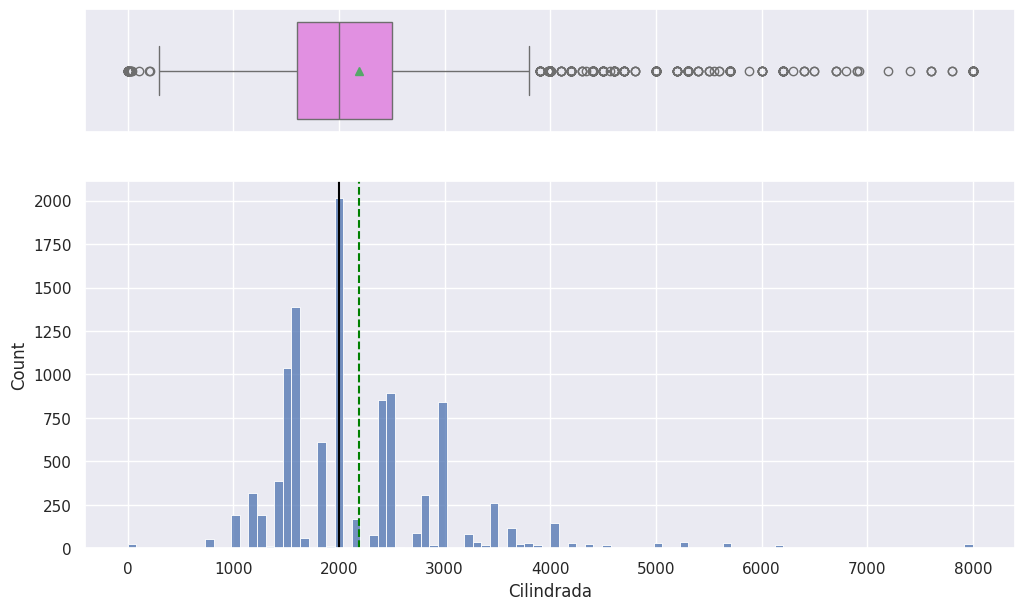

In [103]:
histogram_boxplot(df, "Cilindrada")
# Function to check the skewness of a variable
skewness_value = df['Cilindrada'].skew()

print("Skewness of 'Cilindrada':", skewness_value)

Skewness of 'Kilometraje': 1.2879968289800794


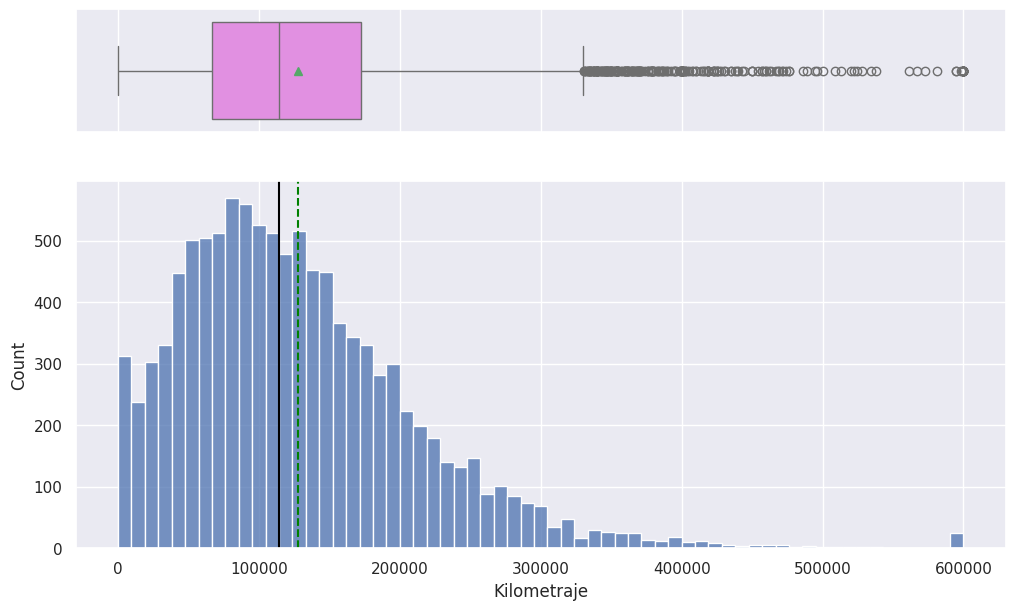

In [104]:
histogram_boxplot(df, "Kilometraje")
# Function to check the skewness of a variable
skewness_value = df['Kilometraje'].skew()

print("Skewness of 'Kilometraje':", skewness_value)

Skewness of 'PrecioCRC': 3.2301266951121463


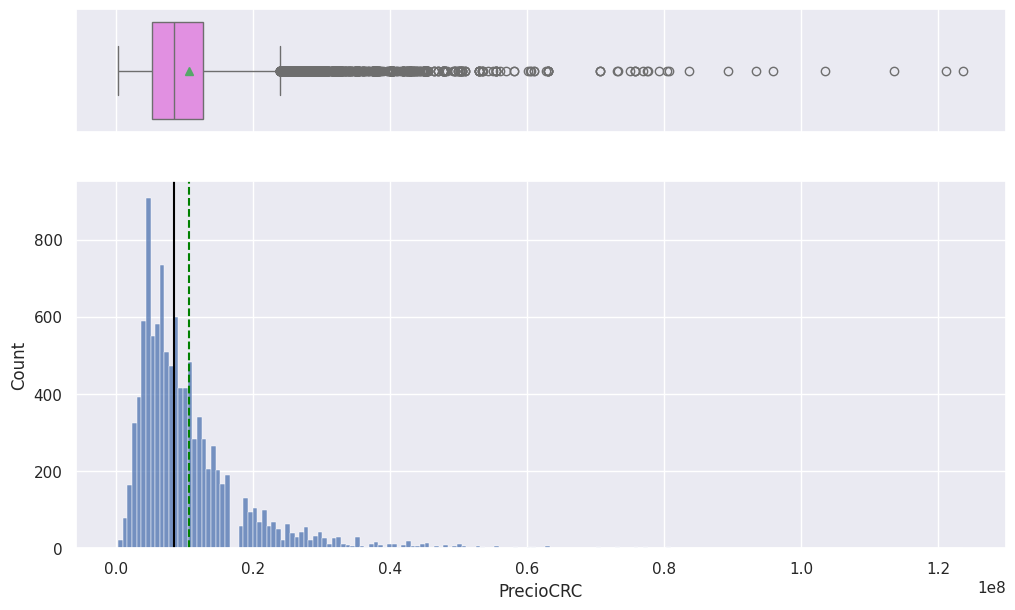

In [105]:
histogram_boxplot(df, "PrecioCRC")
# Function to check the skewness of a variable
skewness_value = df['PrecioCRC'].skew()

print("Skewness of 'PrecioCRC':", skewness_value)

Skewness of 'PrecioUSD': 3.2108041212440828


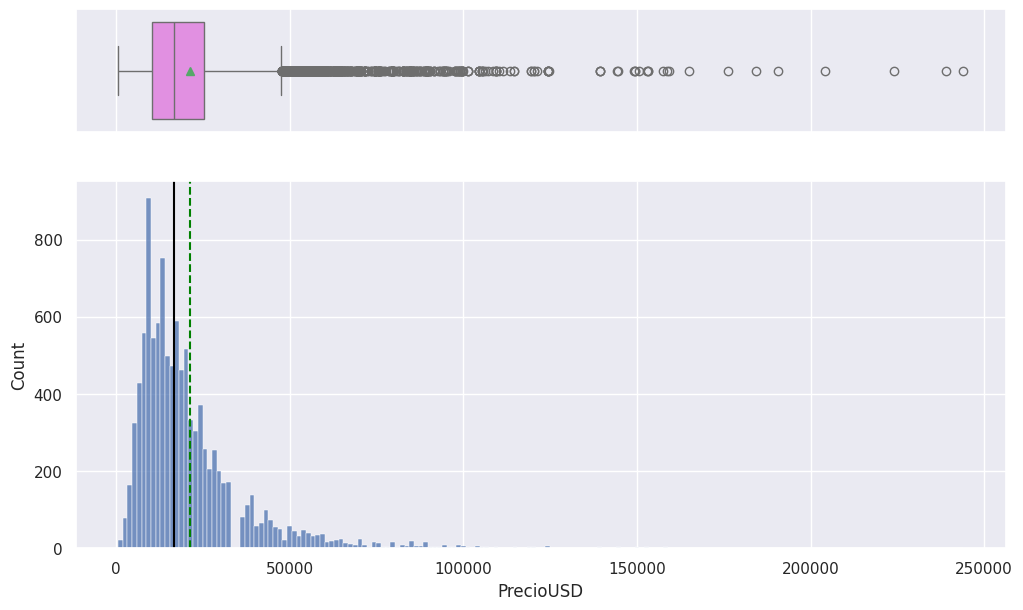

In [106]:
histogram_boxplot(df, "PrecioUSD")
# Function to check the skewness of a variable
skewness_value = df['PrecioUSD'].skew()

print("Skewness of 'PrecioUSD':", skewness_value)

Skewness of 'Edad': 1.618920277537182


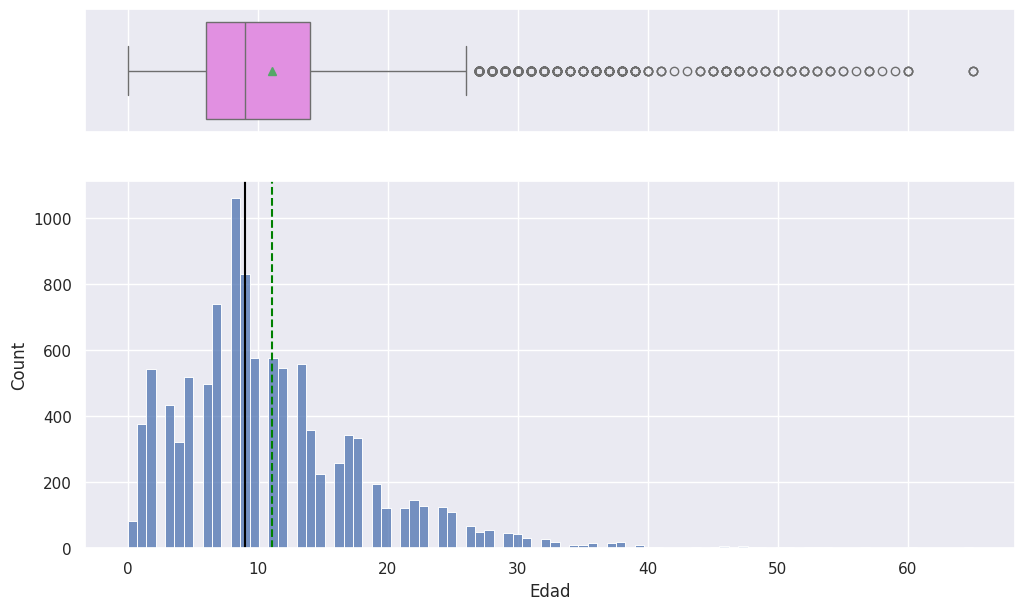

In [107]:
histogram_boxplot(df, "Edad")
# Function to check the skewness of a variable
skewness_value = df['Edad'].skew()

print("Skewness of 'Edad':", skewness_value)

In [108]:
# Function to create labeled barplots

def labeled_barplot(data, feature, perc = False, n = None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])            # Length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize = (count + 1, 5))
    else:
        plt.figure(figsize = (n + 1, 5))

    plt.xticks(rotation = 90, fontsize = 15)
    ax = sns.countplot(
        data = data,
        x = feature,
        palette = "Paired",
        order = data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )                              # Percentage of each class of the category
        else:
            label = p.get_height()         # Count of each level of the category

        x = p.get_x() + p.get_width() / 2  # Width of the plot
        y = p.get_height()                 # Height of the plot

        ax.annotate(
            label,
            (x, y),
            ha = "center",
            va = "center",
            size = 12,
            xytext = (0, 5),
            textcoords = "offset points",
        )                                 # Annotate the percentage

    plt.show()                            # Show the plot

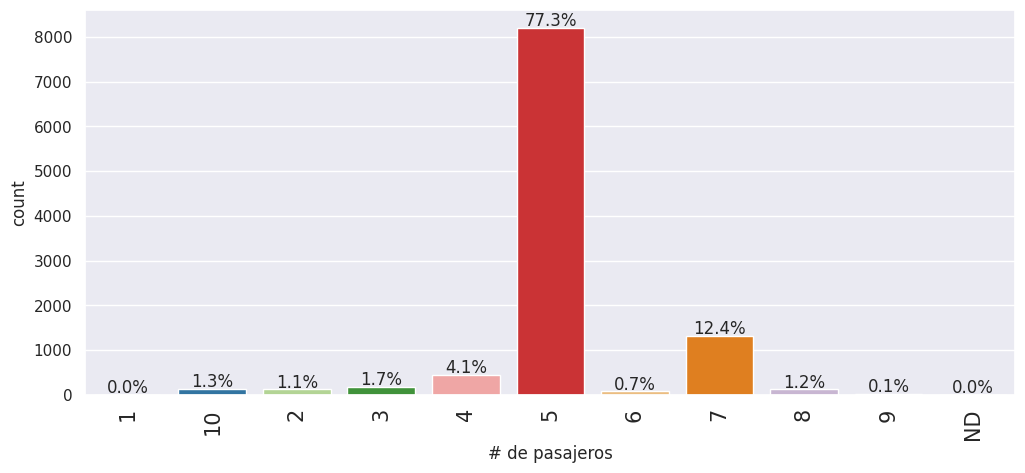

In [109]:
labeled_barplot(df, "# de pasajeros", perc = True)

The column '# de pasajeros' has very little values of 1, which is most likely an error, we will remove all the rows with the value 1 on '# de pasajeros'

In [110]:
df = df[(df['# de pasajeros'] != 'ND') & (df['# de pasajeros'] != '1')]

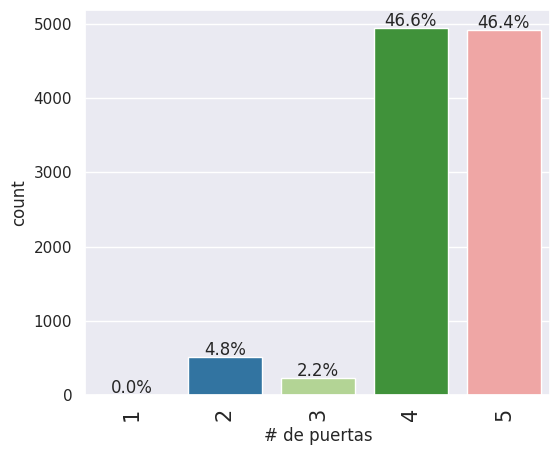

In [111]:
labeled_barplot(df, "# de puertas", perc = True)

In [112]:
df = df[df['# de puertas'] != 1]

The column '# de puerta' has very little values of 1, which is most likely an error, we will remove all the rows with the value 1 on '# de puerta'

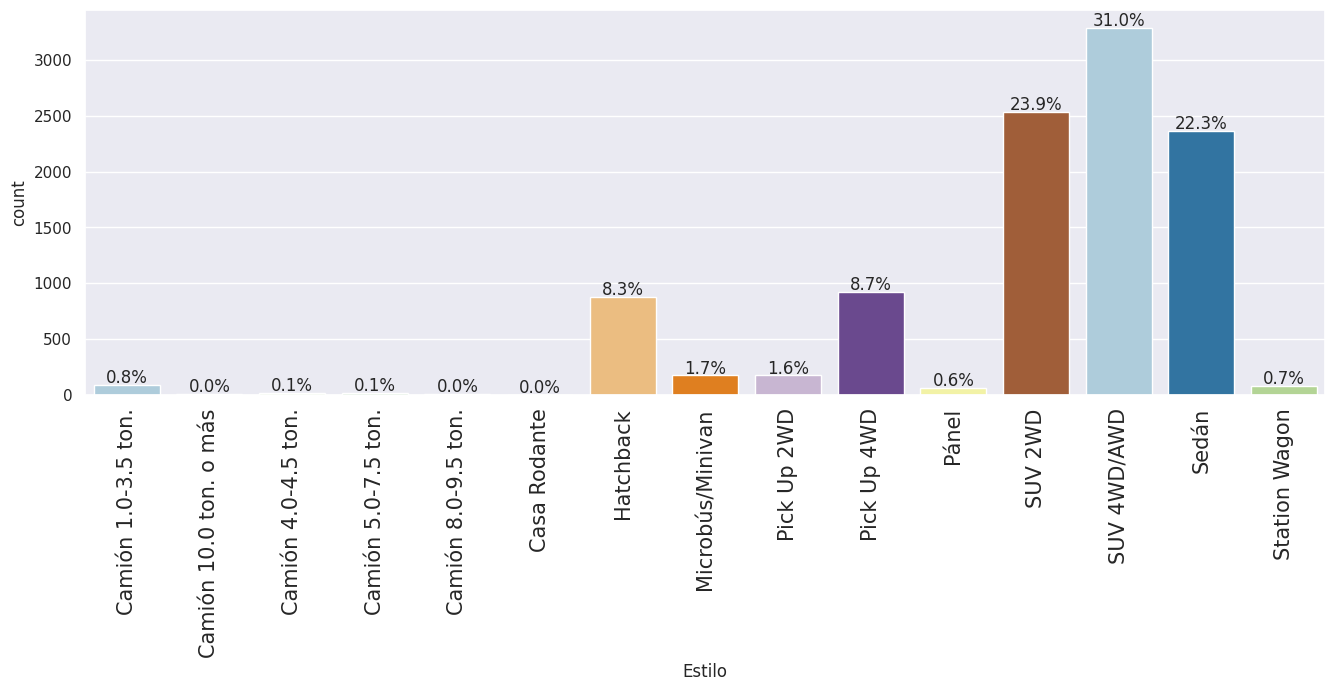

In [113]:
labeled_barplot(df, "Estilo", perc = True)

In [114]:
# Group all 'Camión ...' entries into a single 'Camión' category
df['Estilo'] = df['Estilo'].apply(lambda x: 'Camión' if isinstance(x, str) and x.startswith('Camión') else x)

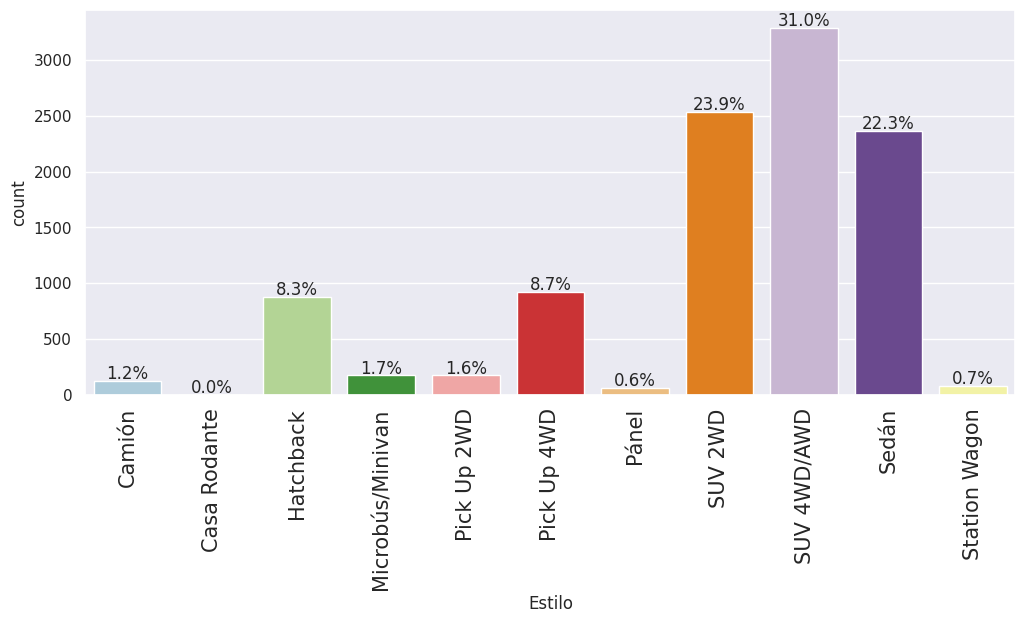

In [115]:
labeled_barplot(df, "Estilo", perc = True)

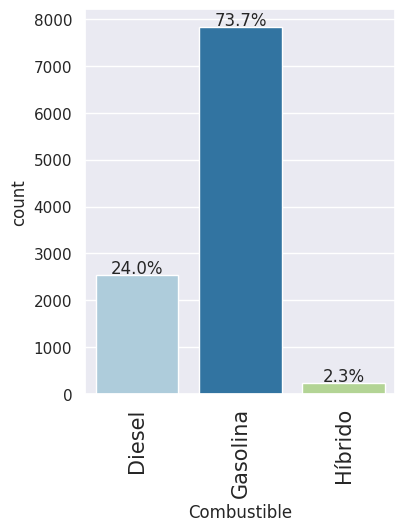

In [116]:
labeled_barplot(df, "Combustible", perc = True)

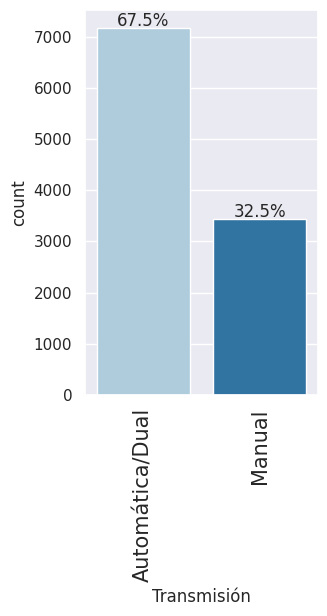

In [117]:
labeled_barplot(df, "Transmisión", perc = True)

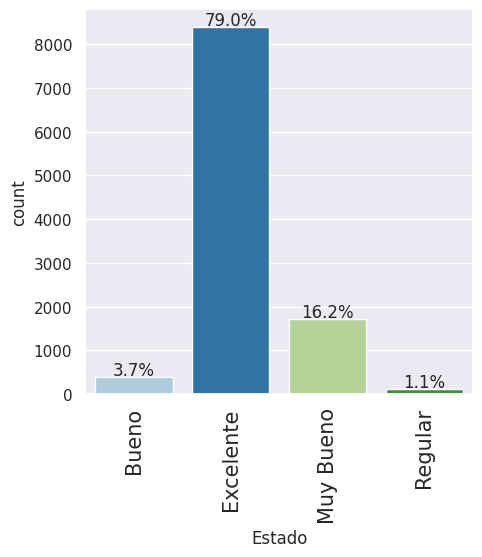

In [118]:
labeled_barplot(df, "Estado", perc = True)

#Building Models

##Dummy Variables

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10605 entries, 0 to 11055
Data columns (total 55 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Modelo                                10605 non-null  object 
 1   Cilindrada                            10605 non-null  Int64  
 2   Estilo                                10605 non-null  object 
 3   # de pasajeros                        10605 non-null  object 
 4   Combustible                           10605 non-null  object 
 5   Transmisión                           10605 non-null  object 
 6   Estado                                10605 non-null  object 
 7   Kilometraje                           10605 non-null  Int64  
 8   # de puertas                          10605 non-null  int64  
 9   Ya pagó impuestos                     10605 non-null  object 
 10  Precio negociable                     10605 non-null  object 
 11  Se recibe vehículo  

Converting the dummy variables previously created into object

In [121]:
columns_to_convert = [
    'dirección hidráulica/electroasistida', 'cierre central', 'asientos eléctricos',
    'vidrios tintados', 'vidrios eléctricos', 'bolsa de aire', 'alarma', 'espejos eléctricos',
    'frenos abs', 'aire acondicionado', 'desempañador trasero', 'sunroof/techo panorámico',
    'aros de lujo', 'turbo', 'tapicería de cuero', 'halógenos', 'cámara 360', 'android auto',
    'control crucero', 'radio con usb/aux', 'revisión técnica al día',
    'control electrónico de estabilidad', 'control de descenso', 'caja de cambios dual',
    'cámara de retroceso', 'sensores de retroceso', 'sensores frontales',
    'control de radio en el volante', 'volante multifuncional', 'aire acondicionado climatizado',
    'retrovisores auto-retractibles', 'luces de xenón/bixenón', 'sensor de lluvia',
    'llave inteligente/botón de arranque', 'apple carplay', 'computadora de viaje',
    'volante ajustable', 'bluetooth'
]

# Convert to object
df[columns_to_convert] = df[columns_to_convert].astype('object')

In [122]:
df['# de pasajeros'] = df['# de pasajeros'].astype('Int64')

In [123]:
df.drop(columns=['Modelo','PrecioCRC'], inplace=True)

In [124]:
# 1. Create target variable
y = df['PrecioUSD']
# 2. Drop columns not needed in X
X = df.drop(['PrecioUSD'], axis=1)

# 3. Encode categorical columns
def encode_cat_vars(x):
    return pd.get_dummies(
        x,
        columns=x.select_dtypes(include=["object"]).columns.tolist(),
        drop_first=True,
    )

X = encode_cat_vars(X)

In [125]:
print(f"Shape of X: {X.shape}")
print(f"Number of features: {X.shape[1]}")

Shape of X: (10605, 144)
Number of features: 144


In [127]:
# Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.30, random_state = 1)

print(X_train.shape, X_test.shape)

X_train.head()

(7423, 144) (3182, 144)


,Cilindrada,# de pasajeros,Kilometraje,# de puertas,Edad,Estilo_Casa Rodante,Estilo_Hatchback,Estilo_Microbús/Minivan,Estilo_Pick Up 2WD,Estilo_Pick Up 4WD,...,volante multifuncional_1,aire acondicionado climatizado_1,retrovisores auto-retractibles_1,luces de xenón/bixenón_1,sensor de lluvia_1,llave inteligente/botón de arranque_1,apple carplay_1,computadora de viaje_1,volante ajustable_1,bluetooth_1
1863,2000,5,72000,5,17,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
7681,2200,7,80000,5,11,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
2755,1200,5,52000,4,7,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,True
4412,1400,7,65500,5,7,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,True
8770,24,5,71371,5,5,False,False,False,False,False,...,True,False,False,False,False,True,False,False,True,True


#XGBoost Regressor


In [128]:
# Installing the xgboost library using the 'pip' command
!pip install xgboost

In [129]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100

# Function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    pred = model.predict(predictors)                  # Predict using the independent variables
    r2 = r2_score(target, pred)                       # To compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)    # To compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # To compute RMSE
    mae = mean_absolute_error(target, pred)           # To compute MAE
    mape = mape_score(target, pred)                   # To compute MAPE

    # Creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [130]:
# Importing XGBoost Regressor
from xgboost import XGBRegressor

# XGBoost Regressor
xgb = XGBRegressor(random_state = 1)

# Fitting the model
xgb.fit(X_train,y_train)

# Model Performance on the test data
xgb_perf_test = model_performance_regression(xgb, X_test, y_test)

xgb_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,7210.799016,3239.237716,0.833131,0.825219,15.63335


##Neural Network

In [131]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Define which columns are numeric and which are categorical
numeric_features = ['Edad', 'Kilometraje', 'Cilindrada']
categorical_features = [col for col in X_train.columns if col not in numeric_features]

# Preprocessor: scale numeric features and one-hot encode categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ]
)

# Fit-transform the training data, transform the test data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Scale the target variable (Precio)
target_scaler = StandardScaler()
y_train_scaled = target_scaler.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_scaled = target_scaler.transform(y_test.values.reshape(-1, 1)).ravel()

# Neural Network model definition
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_transformed.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1)  # Single output for regression
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train_transformed, y_train_scaled,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Predict and inverse transform the target
y_pred_scaled = model.predict(X_test_transformed).flatten()
y_pred = target_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

# Evaluate the model
rmse_nn = np.sqrt(mean_squared_error(y_test, y_pred))
r2_nn = r2_score(y_test, y_pred)

print(f"Neural Network RMSE: {rmse_nn:.2f}")
print(f"Neural Network R² Score: {r2_nn:.4f}")


Epoch 1/200
186/186 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 1.3109 - root_mean_squared_error: 1.1326 - val_loss: 0.5206 - val_root_mean_squared_error: 0.7215
Epoch 2/200
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.5552 - root_mean_squared_error: 0.7439 - val_loss: 0.3434 - val_root_mean_squared_error: 0.5860
Epoch 3/200
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.4224 - root_mean_squared_error: 0.6495 - val_loss: 0.2651 - val_root_mean_squared_error: 0.5149
Epoch 4/200
186/186 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.3996 - root_mean_squared_error: 0.6313 - val_loss: 0.2478 - val_root_mean_squared_error: 0.4978
Epoch 5/200
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.3763 - root_mean_squared_error: 0.6123 - val_loss: 0.2566 - val_root_mean_squared_error: 0.5065
Epoch 6/200
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3752 - root_mean_squared_error: 0.6111 - val_loss: 0.2013 - val_root_mean_squared_error: 0.4486
Epoch 7/200
186/186 ━━━━━━━━━━━━━━━━━━━━ 3s 

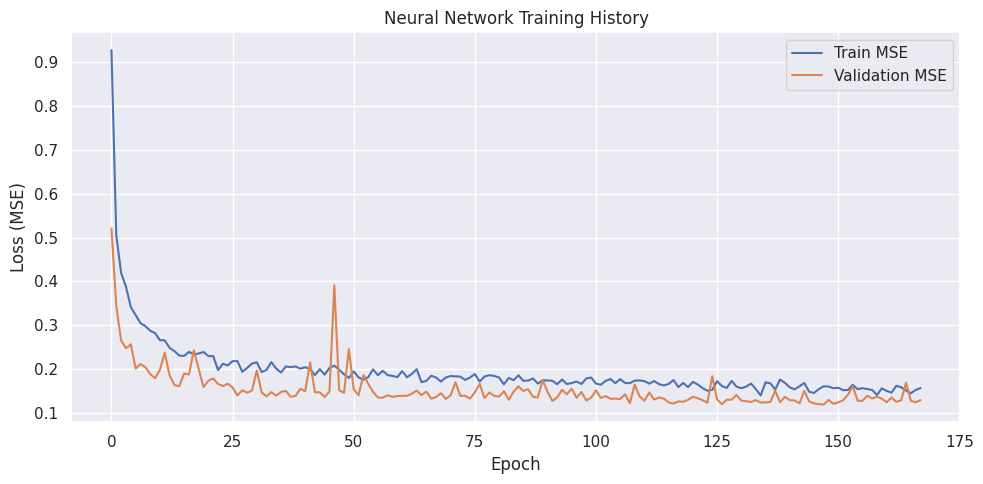

In [132]:
# Plot training vs validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train MSE')
plt.plot(history.history['val_loss'], label='Validation MSE')
plt.title('Neural Network Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Linear Regression

In [133]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# 2. Predict on test set
y_pred = lr_model.predict(X_test)

# 3. Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Manual RMSE
r2 = r2_score(y_test, y_pred)

print("📊 Linear Regression Evaluation Metrics:")
print(f"MAE (Mean Absolute Error): ${mae:,.2f}")
print(f"MSE (Mean Squared Error): ${mse:,.2f}")
print(f"RMSE (Root Mean Squared Error): ${rmse:,.2f}")
print(f"R² (R-squared): {r2:.4f}")

📊 Linear Regression Evaluation Metrics:
MAE (Mean Absolute Error): $5,913.47
MSE (Mean Squared Error): $115,679,895.97
RMSE (Root Mean Squared Error): $10,755.46
R² (R-squared): 0.6287


##Random Forest

In [134]:
# Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators = 100, random_state = 1)

# Fitting the model
rf_regressor.fit(X_train, y_train)

# Model Performance on the test data
rf_regressor_perf_test = model_performance_regression(rf_regressor, X_test, y_test)

rf_regressor_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,7428.978675,3271.766675,0.82288,0.814482,16.008126


In [135]:
# Feature importance
importances = rf_regressor.feature_importances_

# Rename columns
columns = X.columns

# Create a DataFrame with features importance
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)


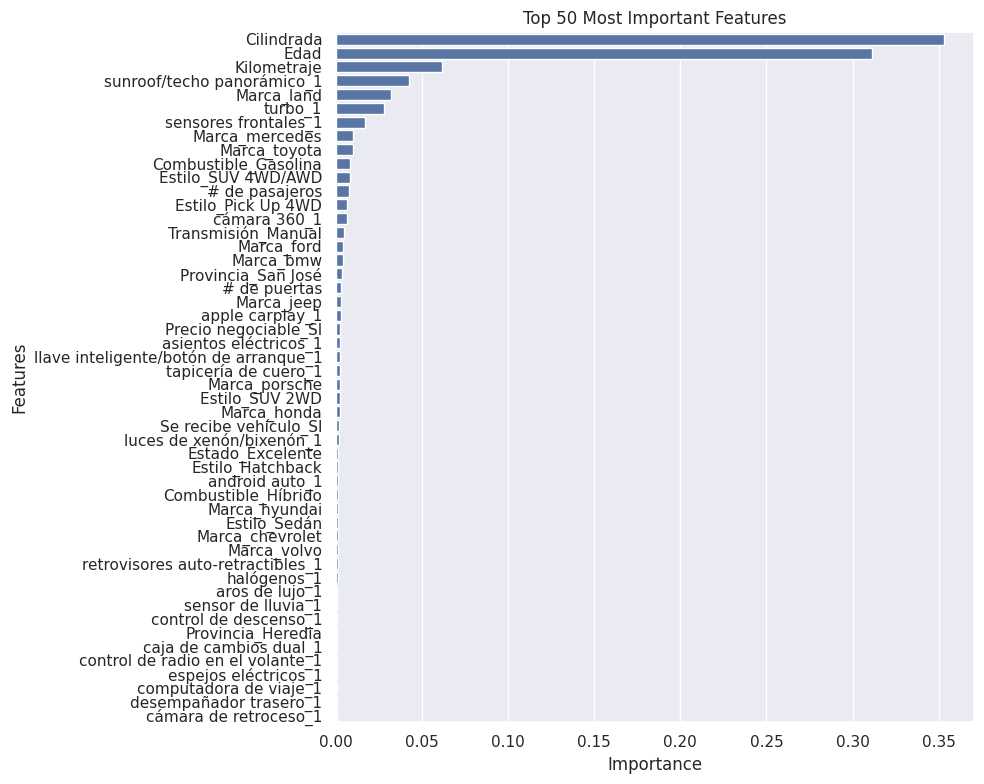

In [136]:
top_n = 50
top_features = importance_df.sort_values(by="Importance", ascending=False).head(top_n)

plt.figure(figsize=(10, 8))
sns.barplot(x="Importance", y=top_features.index, data=top_features)
plt.title(f"Top {top_n} Most Important Features")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

**Conclusion**

This project demonstrated the full lifecycle of a data science solution — from web scraping and data cleaning to model training and evaluation — using real-world data from Costa Rica’s used car market (Crautos.com). After standardizing prices, extracting structured features, and engineering relevant variables, multiple regression models were tested, including linear models, tree-based methods, and ensemble techniques.

The results showed that a Neural Network model achieved the highest predictive performance, outperforming linear and ensemble methods by effectively capturing the complex, nonlinear relationships between features such as brand, model, year, mileage, and engine size. This demonstrates the potential of deep learning for market price estimation in dynamic and noisy real-world datasets.